#Small-angle X-ray scattering and Root-mean-square deviation of atomic positions correlation using Machine Learning 

###Small-angle X-ray scattering
Small-angle X-ray scattering (SAXS) is a small-angle scattering (SAS) technique where the elastic scattering of X-rays (wavelength 0.1 ... 0.2 nm) by a sample which has inhomogeneities in the nm-range, is recorded at very low angles (typically 0.1 - 10°). This angular range contains information about the shape and size of macromolecules, characteristic distances of partially ordered materials, pore sizes, and other data. SAXS is capable of delivering structural information of macromolecules between 5 and 25 nm, of repeat distances in partially ordered systems of up to 150 nm.[1] USAXS (ultra-small angle X-ray scattering) can resolve even larger dimensions.

![SAXS Scheme](saxs.gif)

Two youtube videos introducing SAXS:
- [One](https://www.youtube.com/watch?v=SevPRumWqsE)
- [Two](https://www.youtube.com/watch?v=mPoshDWJucI)

###Root-mean-square deviation of atomic positions
The root-mean-square deviation (RMSD) is the measure of the average distance between the atoms (usually the backbone atoms) of superimposed proteins. In the study of globular protein conformations, one customarily measures the similarity in three-dimensional structure by the RMSD of the Cα atomic coordinates after optimal rigid body superposition.

When a dynamical system fluctuates about some well-defined average position, the RMSD from the average over time can be referred to as the RMSF or root mean square fluctuation. The size of this fluctuation can be measured, for example using Mössbauer spectroscopy or nuclear magnetic resonance, and can provide important physical information. The Lindemann index is a method of placing the RMSF in the context of the parameters of the system.

### Machine Learning
Machine learning is a subfield of computer science that evolved from the study of pattern recognition and computational learning theory in artificial intelligence. Machine learning explores the construction and study of algorithms that can learn from and make predictions on data.

### Case study
In this case, as we have a lot of dimenssions for each vector, it would be a good idea to perform a **PCA** and then try to predict the quantity of Y using *Lasso* or *ElasticNet*

In [24]:
%%html
<img src="cheat_sheet.png">

In [1]:
import numpy as np

In [1]:
!ls -l

total 4528
-rw-r--r--  1 gabi  staff   364336 Jun 23 13:01 Understanding Data.ipynb
-rw-r-----@ 1 gabi  staff  1932080 Jun 22 13:51 curves.npy
-rw-r-----@ 1 gabi  staff    19400 Jun 22 13:51 rmsds.npy


In [2]:
# load arrays
curves = np.load('curves.npy')
rmsds = np.load('rmsds.npy')

In [3]:
curves.shape, curves.size, curves.dtype

((2415, 100), 241500, dtype('float64'))

In [4]:
rmsds.shape, rmsds.size, rmsds.dtype

((2415,), 2415, dtype('float64'))

In our data X will be the SAXS curves, with 2415 vectors of 100 dimensions. The Y will be the measure obtained from RMSD

In [6]:
%matplotlib inline 
import matplotlib.pyplot as plt

In [5]:
plt.plot(curves[0])
curves[0].max(), curves.min(), curves.mean()

(11961.0, -187533.60000000001, 45210.422315113872)

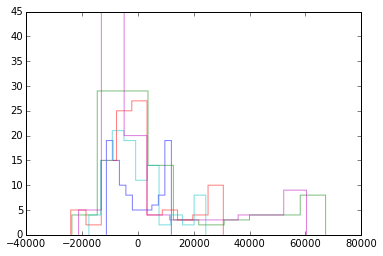

In [7]:
for protein in curves[:5]:
    plt.hist(protein, alpha=0.5, histtype='step')

Most repetead values are between -20.000 and 20.000

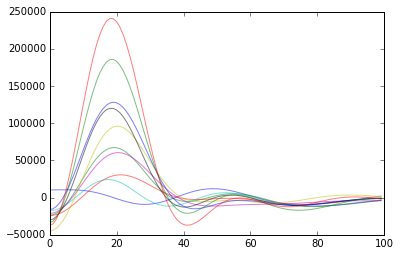

In [8]:
for protein in curves[:10]:
    plt.plot(protein, alpha=0.5)

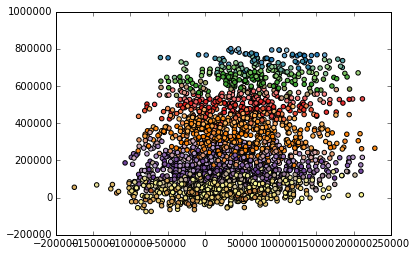

In [9]:
fig_scatter_20 = plt.figure()
plt.scatter(curves[:, 0], curves[:, 20], c=rmsds, cmap=plt.cm.Paired_r)

Biggest variations can be found on the first 40 values

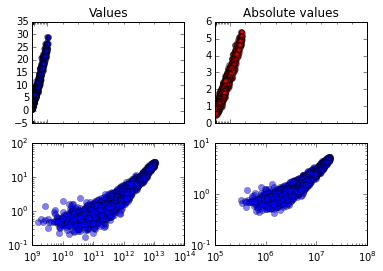

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')

ax1.set_title('Values')
ax1.scatter(np.sum(curves**2, axis=1), rmsds**2, marker='o', c='b', alpha=0.5)

ax2.set_title('Absolute values')
ax2.scatter(np.sum(np.abs(curves), axis=1), rmsds, marker='o', c='r', alpha=0.5)

#logaritmic scaling
ax3.loglog(np.sum(curves**2, axis=1), rmsds**2, 'o', alpha=0.5)
ax4.loglog(np.sum(np.abs(curves), axis=1), rmsds, 'o', alpha=0.5)

In [11]:
from sklearn.decomposition import PCA

In [12]:
X = curves
Y = rmsds

In [32]:
pca = PCA(n_components=3)
pca.fit_transform(X)

array([[-1104044.10977348,   -26056.54371135,    34080.39809227],
       [ -892606.82491014,  -180036.70840181,    52667.2667245 ],
       [-1032726.89705463,  -161231.18747735,    38278.48956034],
       ..., 
       [-1059974.53894354,  -287554.03631767,     3981.98521909],
       [-1011882.11306982,  -119055.72307167,    34031.79360887],
       [-1066392.01304316,   100690.6944715 ,    59531.89505477]])

In [29]:
pca.get_precision()

array([[  1.22572132e-08,  -1.11577234e-09,  -1.09950679e-09, ...,
         -7.61501503e-12,  -8.34535978e-12,  -9.22371447e-12],
       [ -1.11577234e-09,   1.22679129e-08,  -1.09451254e-09, ...,
         -7.53879379e-12,  -8.25699738e-12,  -9.12284663e-12],
       [ -1.09950679e-09,  -1.09451254e-09,   1.22989290e-08, ...,
         -7.31111279e-12,  -7.99315923e-12,  -8.82173780e-12],
       ..., 
       [ -7.61501503e-12,  -7.53879379e-12,  -7.31111279e-12, ...,
          1.33783143e-08,  -8.16506385e-14,  -9.19061730e-14],
       [ -8.34535978e-12,  -8.25699738e-12,  -7.99315923e-12, ...,
         -8.16506385e-14,   1.33782940e-08,  -1.04295694e-13],
       [ -9.22371447e-12,  -9.12284663e-12,  -8.82173780e-12, ...,
         -9.19061730e-14,  -1.04295694e-13,   1.33782689e-08]])

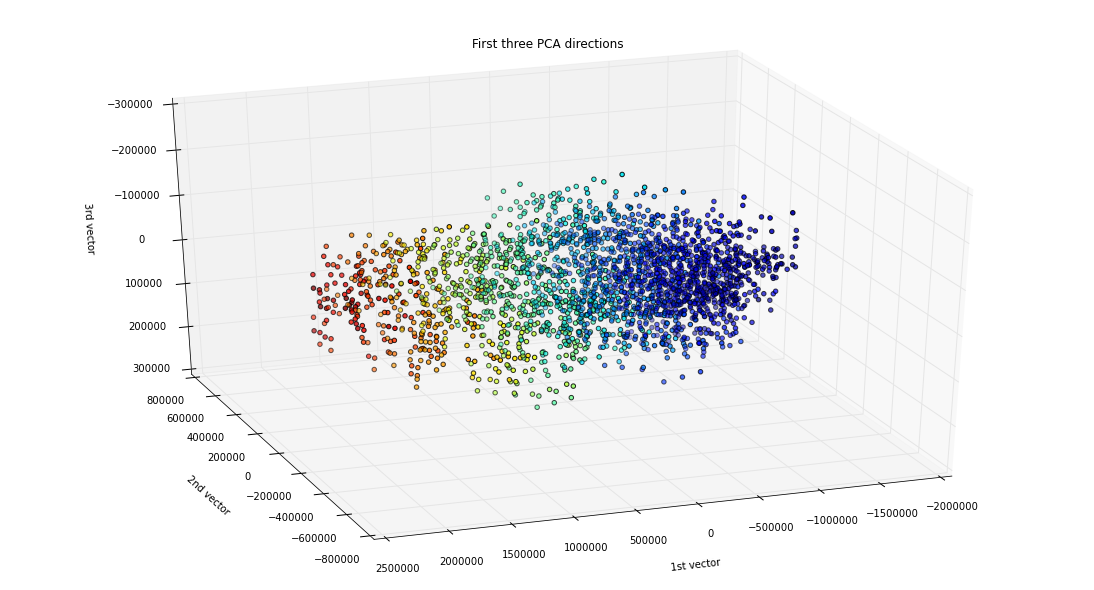

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# To getter a better understanding of interaction of the dimensions
fig = plt.figure(1, figsize=(15, 8))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(curves)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=rmsds)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st vector")
ax.set_ylabel("2nd vector")
ax.set_zlabel("3rd vector")

In [16]:
import plotly
plotly.tools.set_credentials_file(username='merqurio', api_key='s74nft8nuf', stream_ids=['chvycfpauq', 'zzjhbj7ixv'])

In [33]:
from plotly.graph_objs import Scatter3d, Data, Marker

trace0 = Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    marker=Marker(color=rmsds, colorscale='Portland'),
    mode='markers'
)
data = Data([trace0])



In [34]:
plotly.plotly.iplot(data, filename = 'basic-line')